In [9]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu128

Looking in indexes: https://download.pytorch.org/whl/cu128
  Using cached https://download.pytorch.org/whl/mpmath-1.3.0-py3-none-any.whl (536 kB)
   ---------------------------------------- 0.0/3.3 GB ? eta -:--:--
   ---------------------------------------- 0.0/3.3 GB 93.4 MB/s eta 0:00:36
   ---------------------------------------- 0.0/3.3 GB 97.5 MB/s eta 0:00:34
    --------------------------------------- 0.1/3.3 GB 94.0 MB/s eta 0:00:35
    --------------------------------------- 0.1/3.3 GB 97.1 MB/s eta 0:00:34
   - -------------------------------------- 0.1/3.3 GB 97.8 MB/s eta 0:00:34
   - -------------------------------------- 0.1/3.3 GB 98.5 MB/s eta 0:00:33
   - -------------------------------------- 0.1/3.3 GB 99.0 MB/s eta 0:00:33
   - -------------------------------------- 0.2/3.3 GB 100.0 MB/s eta 0:00:32
   -- ------------------------------------- 0.2/3.3 GB 100.9 MB/s eta 0:00:32
   -- ------------------------------------- 0.2/3.3 GB 100.6 MB/s eta 0:00:32
   -- ------

In [4]:
import scipy.io as sio
import numpy as np
import os
from pprint import pprint

def analyze_mat_file(file_path):
    """
    Load a .mat file and print all metadata
    """
    print(f"Analyzing: {file_path}")
    
    # Check if file exists
    if not os.path.exists(file_path):
        print(f"Error: File not found at {file_path}")
        return
    
    # Get file size
    file_size = os.path.getsize(file_path) / (1024 * 1024)  # Size in MB
    print(f"File size: {file_size:.2f} MB")
    
    # Load the .mat file
    try:
        mat_data = sio.loadmat(file_path)
        print("Successfully loaded .mat file")
    except Exception as e:
        print(f"Error loading file: {e}")
        return
    
    # Print file metadata
    print("\n=== File Metadata ===")
    for key in mat_data.keys():
        if key.startswith('__'):  # These are metadata keys
            print(f"{key}: {mat_data[key]}")
    
    # Print all variables in the file
    print("\n=== Variables ===")
    var_count = 0
    for key in mat_data.keys():
        if not key.startswith('__'):  # Skip metadata keys
            var_count += 1
            print(f"\nVariable {var_count}: {key}")
            value = mat_data[key]
            print(f"  Type: {type(value)}")
            
            if isinstance(value, np.ndarray):
                print(f"  Shape: {value.shape}")
                print(f"  Data type: {value.dtype}")
                
                # Print more details for object arrays
                if value.dtype == np.object_ or value.dtype.kind == 'O':
                    if value.size > 0:
                        first_elem = value.item() if value.size == 1 else value.flat[0]
                        print(f"  First element type: {type(first_elem)}")
                        if hasattr(first_elem, 'shape'):
                            print(f"  First element shape: {first_elem.shape}")
                
                # Print array statistics for numeric arrays
                if value.dtype.kind in 'ifu' and value.size > 0:  # integer, float, unsigned int
                    try:
                        print(f"  Min: {np.min(value)}")
                        print(f"  Max: {np.max(value)}")
                        print(f"  Mean: {np.mean(value)}")
                    except:
                        print("  Cannot compute statistics")
    
    print(f"\nTotal variables: {var_count}")
    
    # Deeper inspection of nested structures
    print("\n=== Nested Structures ===")
    for key in mat_data.keys():
        if not key.startswith('__'):
            print(f"\nStructure of: {key}")
            inspect_structure(mat_data[key])

def inspect_structure(obj, depth=0, max_depth=3):
    """
    Recursively inspect nested structures within a MATLAB object
    """
    prefix = "  " * depth
    
    if depth >= max_depth:
        print(f"{prefix}... (max depth reached)")
        return
    
    if isinstance(obj, np.ndarray):
        print(f"{prefix}Array: shape={obj.shape}, dtype={obj.dtype}")
        
        # For object arrays, inspect the first element
        if obj.dtype == np.object_ or obj.dtype.kind == 'O':
            if obj.size > 0:
                print(f"{prefix}Contents:")
                first_elem = obj.item() if obj.size == 1 else obj.flat[0]
                inspect_structure(first_elem, depth + 1, max_depth)
    
    elif isinstance(obj, dict):
        print(f"{prefix}Dict with {len(obj)} keys")
        for k, v in obj.items():
            print(f"{prefix}Key: {k}")
            inspect_structure(v, depth + 1, max_depth)
    
    elif isinstance(obj, (list, tuple)):
        print(f"{prefix}{type(obj).__name__} of length {len(obj)}")
        if len(obj) > 0:
            inspect_structure(obj[0], depth + 1, max_depth)
    
    else:
        print(f"{prefix}Value: {type(obj)}")

# Example usage
if __name__ == "__main__":
    file_path = "Z:\database\samples\P20240726-1334.mat"  # Update with your file path
    analyze_mat_file(file_path)

Analyzing: Z:\database\samples\P20240726-1334.mat
File size: 3973.64 MB
Successfully loaded .mat file

=== File Metadata ===
__header__: b'PicoScope 7 T&M, Created on: 2025?5?8?'
__version__: 1.0
__globals__: []

=== Variables ===

Variable 1: Tstart
  Type: <class 'numpy.ndarray'>
  Shape: (1, 1)
  Data type: float32
  Min: 0.0
  Max: 0.0
  Mean: 0.0

Variable 2: Tinterval
  Type: <class 'numpy.ndarray'>
  Shape: (1, 1)
  Data type: float64
  Min: 1.9199999812258284e-08
  Max: 1.9199999812258284e-08
  Mean: 1.9199999812258284e-08

Variable 3: ExtraSamples
  Type: <class 'numpy.ndarray'>
  Shape: (1, 1)
  Data type: int32
  Min: 0
  Max: 0
  Mean: 0.0

Variable 4: RequestedLength
  Type: <class 'numpy.ndarray'>
  Shape: (1, 1)
  Data type: int32
  Min: 260416669
  Max: 260416669
  Mean: 260416669.0

Variable 5: Length
  Type: <class 'numpy.ndarray'>
  Shape: (1, 1)
  Data type: int32
  Min: 260416669
  Max: 260416669
  Mean: 260416669.0

Variable 6: Version
  Type: <class 'numpy.ndarra

C:\Users\apetr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


  Mean: nan

Variable 8: TDX2
  Type: <class 'numpy.ndarray'>
  Shape: (1, 260416673)
  Data type: float32
  Min: -inf
  Max: inf
  Mean: nan

Variable 9: TDX3
  Type: <class 'numpy.ndarray'>
  Shape: (1, 260416673)
  Data type: float32
  Min: -0.07827788591384888
  Max: 0.0978473573923111
  Mean: 0.007085398770868778

Variable 10: TDX1_enlarged
  Type: <class 'numpy.ndarray'>
  Shape: (1, 260416673)
  Data type: float32
  Min: -inf
  Max: inf
  Mean: nan

Total variables: 10

=== Nested Structures ===

Structure of: Tstart
Array: shape=(1, 1), dtype=float32

Structure of: Tinterval
Array: shape=(1, 1), dtype=float64

Structure of: ExtraSamples
Array: shape=(1, 1), dtype=int32

Structure of: RequestedLength
Array: shape=(1, 1), dtype=int32

Structure of: Length
Array: shape=(1, 1), dtype=int32

Structure of: Version
Array: shape=(1,), dtype=<U11

Structure of: TDX1
Array: shape=(1, 260416673), dtype=float32

Structure of: TDX2
Array: shape=(1, 260416673), dtype=float32

Structure of: T

Available keys in file:
- Tstart: shape=(1, 1)
- Tinterval: shape=(1, 1)
- ExtraSamples: shape=(1, 1)
- RequestedLength: shape=(1, 1)
- Length: shape=(1, 1)
- Version: shape=(1,)
- TDX1: shape=(1, 260416673)
- TDX2: shape=(1, 260416673)
- TDX3: shape=(1, 260416673)
- TDX1_enlarged: shape=(1, 260416673)
Using channel: TDX1
Sampling rate from file: 52.1 MHz


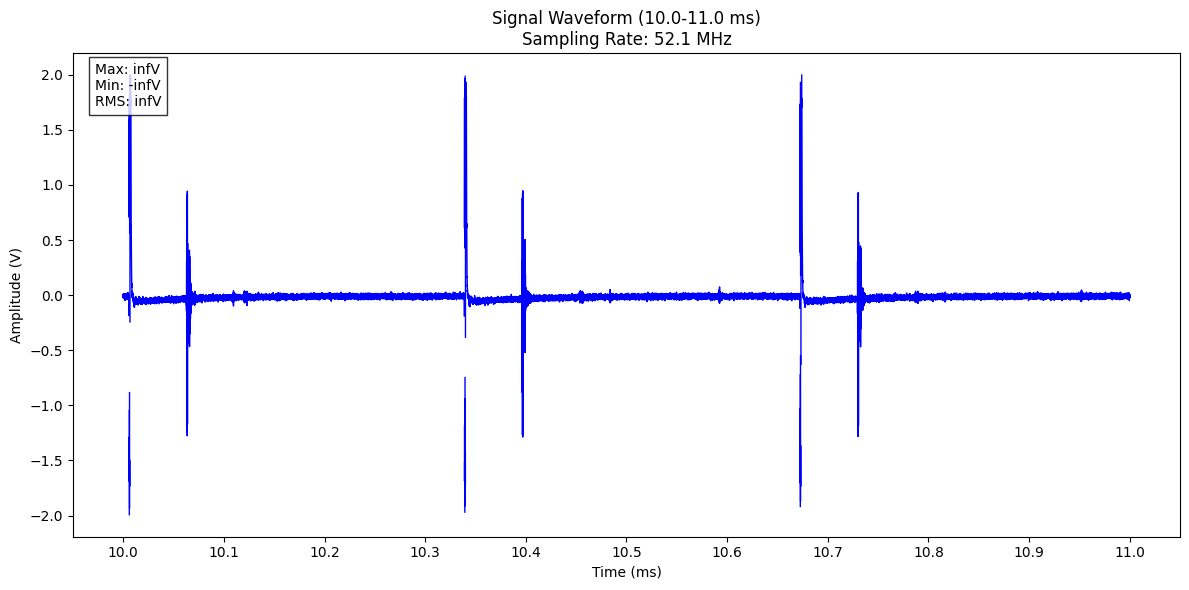

In [3]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
def plot_signal_waveform(file_path, start_ms=0, end_ms=100):
    """
    Display signal waveform from .mat file
    
    Parameters:
    -----------
    file_path : str
        Path to .mat file
    start_ms : float 
        Start time (milliseconds)
    end_ms : float
        End time (milliseconds)
    """
    # Load and inspect data
    mat_data = sio.loadmat(file_path)
    
    # Display available keys
    print("Available keys in file:")
    for key in mat_data.keys():
        if not key.startswith('__'):
            print(f"- {key}: shape={mat_data[key].shape}")
    
    # Try different possible channel names
    channel_names = ['TDX1', 'A', 'B', 'Channel_A', 'Channel_1']
    signal = None
    
    for name in channel_names:
        if name in mat_data:
            signal = mat_data[name].flatten()
            print(f"Using channel: {name}")
            break
    
    if signal is None:
        raise ValueError("No valid channel found in the file")
    
    # Get sampling frequency
    if 'Tinterval' in mat_data:
        sampling_interval = mat_data['Tinterval'][0][0]  # sampling interval (s)
        sampling_rate = 1 / sampling_interval
        print(f"Sampling rate from file: {sampling_rate/1e6:.1f} MHz")
    else:
        print("Warning: Sampling rate not found, using default 62.5MHz")
        sampling_rate = 62.5e6  # Hz
    
    # Generate time axis (milliseconds)
    time_ms = np.arange(len(signal)) / sampling_rate * 1000
    
    # Limit display range
    mask = (time_ms >= start_ms) & (time_ms <= end_ms)
    
    # Create plot
    plt.figure(figsize=(12, 6))
    plt.plot(time_ms[mask], signal[mask], 'b-', linewidth=1)
    #plt.grid(True, which='both')
    #plt.minorticks_on()
    plt.xlabel('Time (ms)')
    plt.ylabel('Amplitude (V)')
    plt.title(f'Signal Waveform ({start_ms:.1f}-{end_ms:.1f} ms)\nSampling Rate: {sampling_rate/1e6:.1f} MHz')
    
    # Set x-axis ticks
    tick_interval = 0.1  # 0.1ms intervals
    plt.xticks(np.arange(start_ms, end_ms+tick_interval, tick_interval))
    
    # Display statistics
    signal_section = signal[mask]
    plt.text(0.02, 0.98, 
             f'Max: {np.max(signal_section):.3f}V\n'
             f'Min: {np.min(signal_section):.3f}V\n'
             f'RMS: {np.sqrt(np.mean(signal_section**2)):.3f}V',
             transform=plt.gca().transAxes,
             bbox=dict(facecolor='white', alpha=0.8),
             verticalalignment='top')
    
    plt.tight_layout()
    plt.show()

# Run analysis
#file_path = '/mnt/sdb/matsubara/tmp/sensor_data.mat'
file_path = "Z:\database\samples\P20240726-1334.mat"
plot_signal_waveform(file_path, start_ms=10, end_ms=11)

Available keys in file:
- Tstart: shape=(1, 1)
- Tinterval: shape=(1, 1)
- ExtraSamples: shape=(1, 1)
- RequestedLength: shape=(1, 1)
- Length: shape=(1, 1)
- Version: shape=(1,)
- TDX1: shape=(1, 260416673)
- TDX2: shape=(1, 260416673)
- TDX3: shape=(1, 260416673)
- TDX1_enlarged: shape=(1, 260416673)
Using channel: TDX1
Sampling rate from file: 52.1 MHz


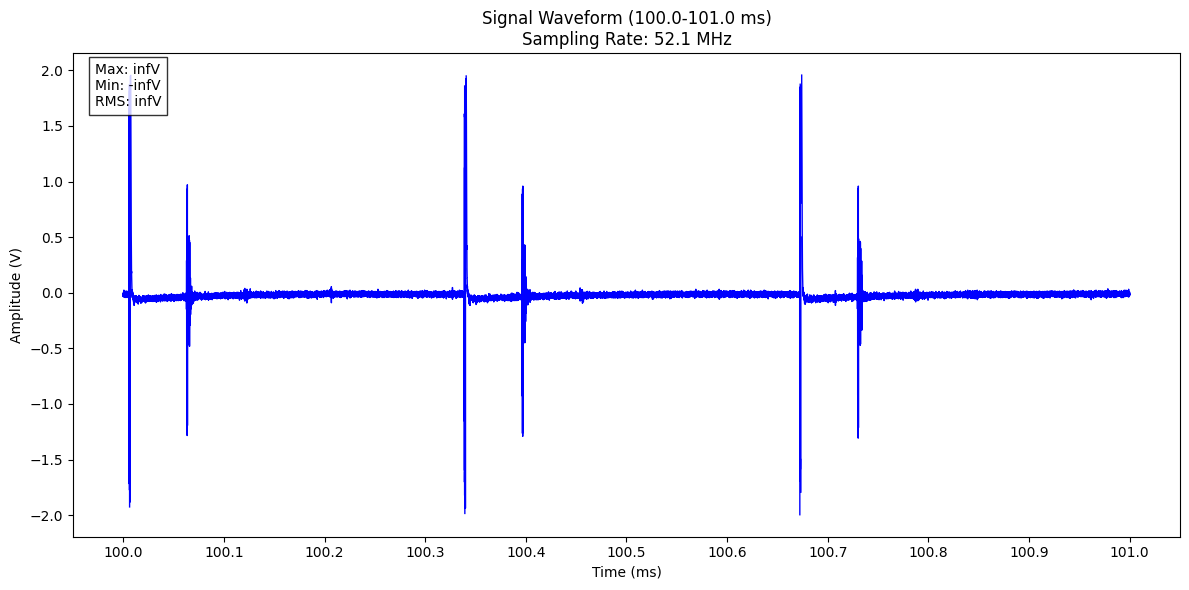

Loading data...
loading success
Found 15 triggered pulses
ヒルベルト変換行列の形状: (15, 5208) (パルス数 × サンプル数)


C:\TEMP\ipykernel_41224\1513984772.py:116: UserWarning: Glyph 26178 (\N{CJK UNIFIED IDEOGRAPH-6642}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\TEMP\ipykernel_41224\1513984772.py:116: UserWarning: Glyph 38291 (\N{CJK UNIFIED IDEOGRAPH-9593}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\TEMP\ipykernel_41224\1513984772.py:116: UserWarning: Glyph 12497 (\N{KATAKANA LETTER PA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\TEMP\ipykernel_41224\1513984772.py:116: UserWarning: Glyph 12523 (\N{KATAKANA LETTER RU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\TEMP\ipykernel_41224\1513984772.py:116: UserWarning: Glyph 12473 (\N{KATAKANA LETTER SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\TEMP\ipykernel_41224\1513984772.py:116: UserWarning: Glyph 30058 (\N{CJK UNIFIED IDEOGRAPH-756A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\TEMP\ipykernel_41224\1513984772.py:116: UserWarning: Glyph 21495 (\N{CJK UNIFIED IDEO

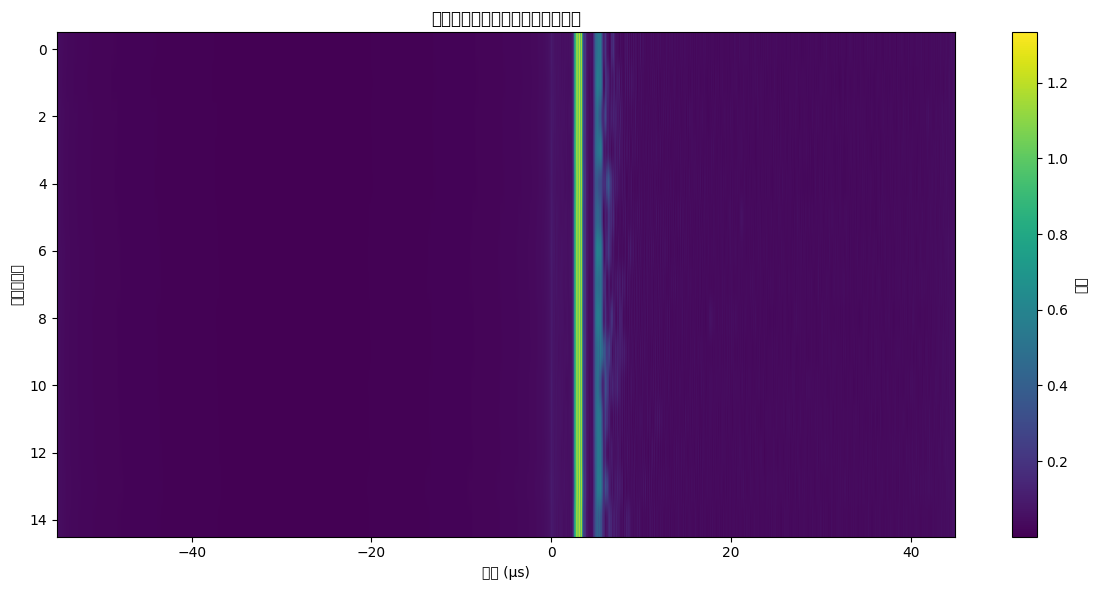

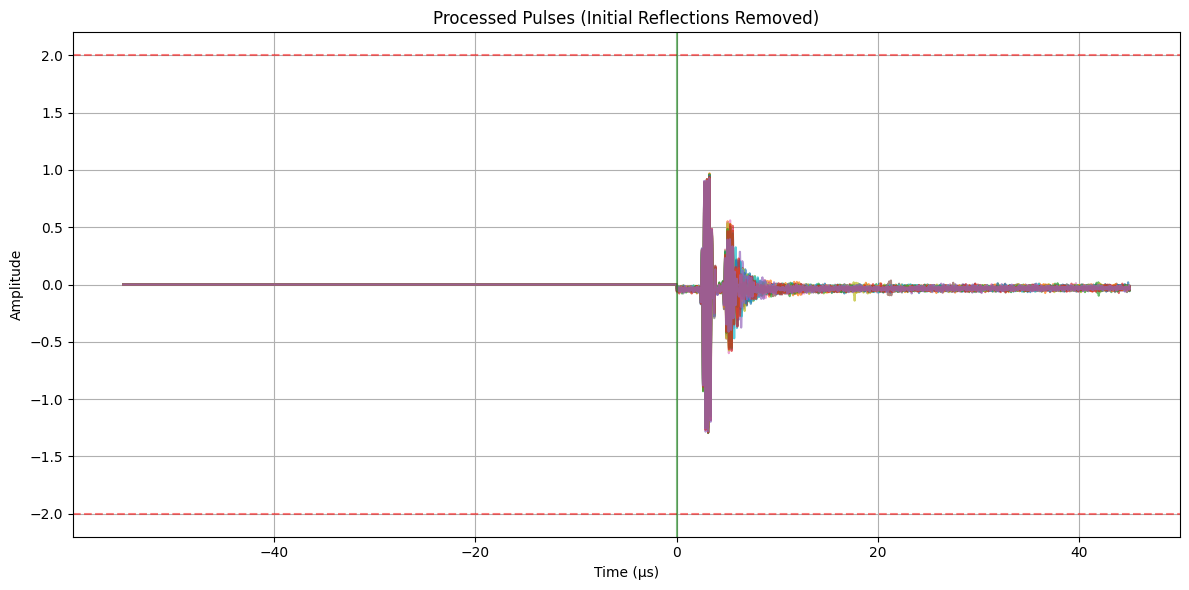

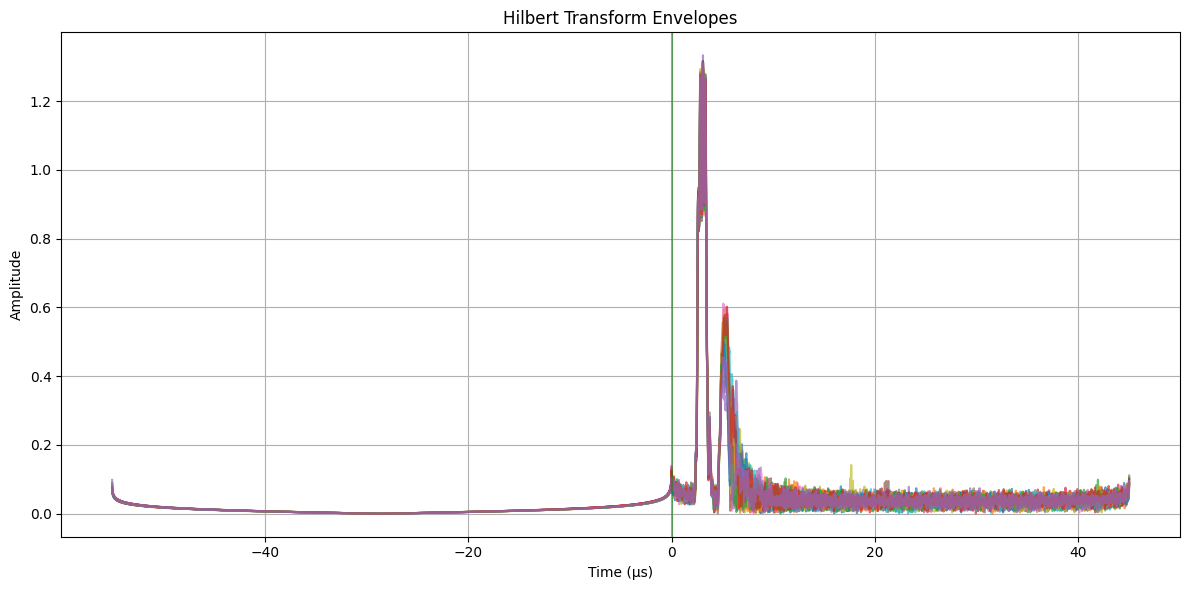

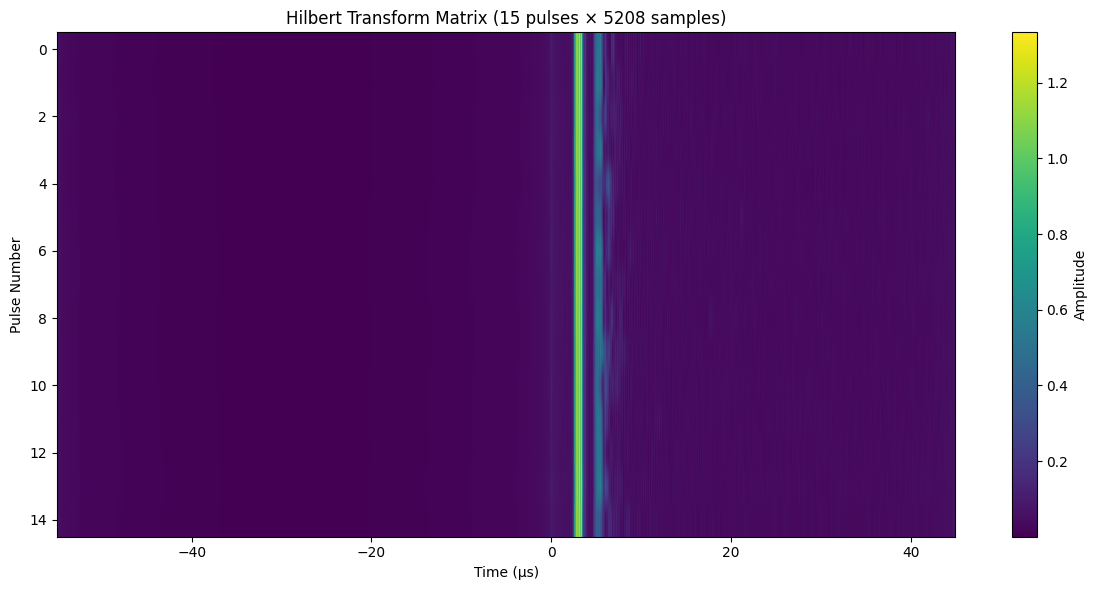

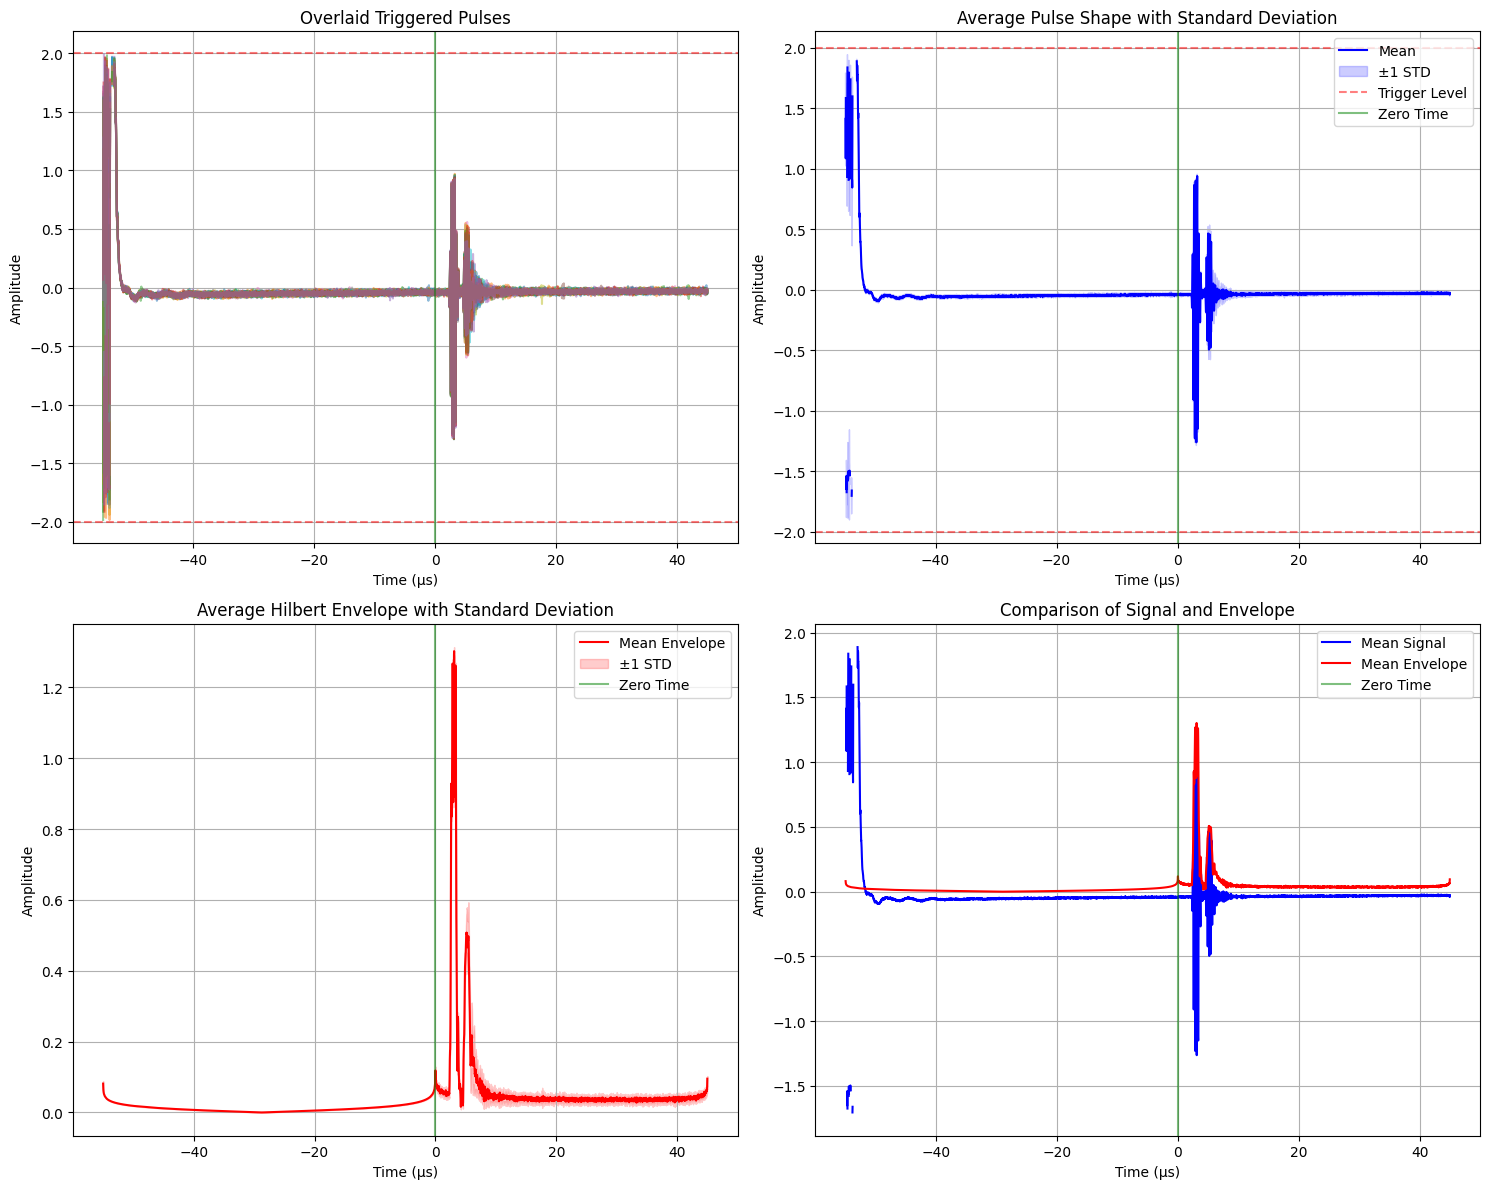

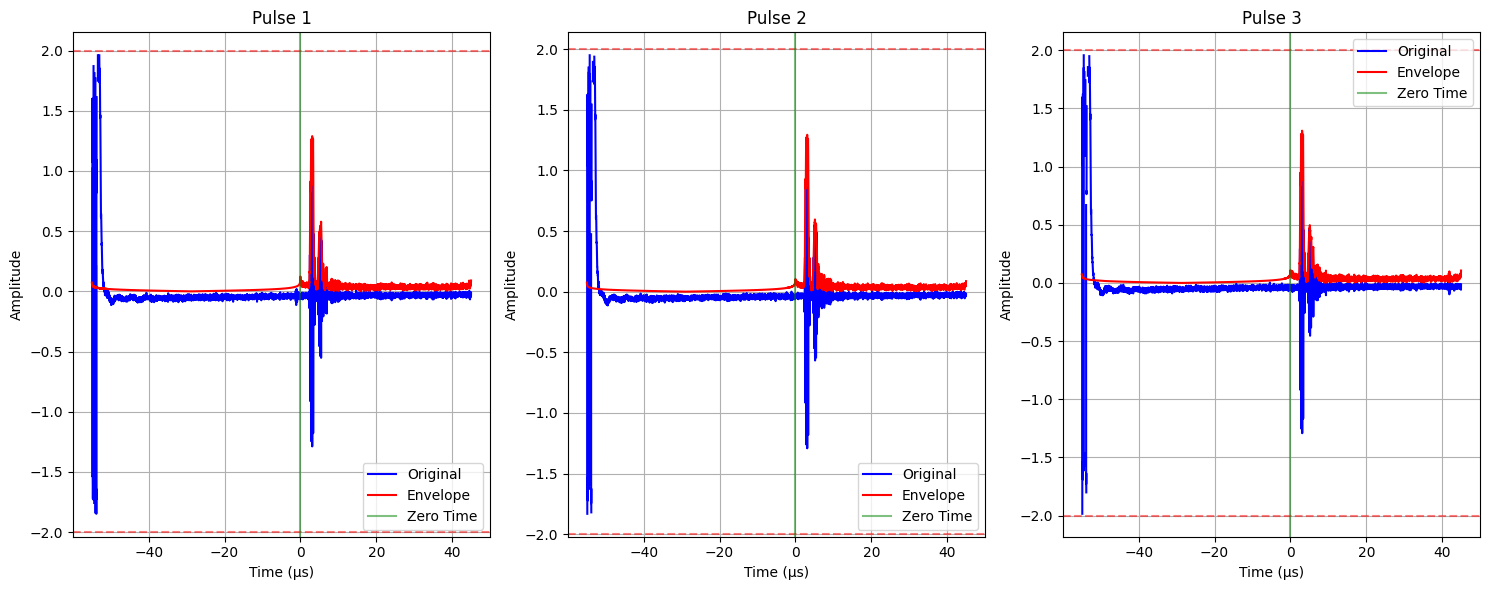

In [24]:
import numpy as np
import scipy.io as sio
import torch
import matplotlib.pyplot as plt
from scipy import signal

def extract_amplitude_triggered_pulses(file_path, start_time=0.444, duration=0.001, 
                                    window_width=50e-6, amplitude_threshold=2.0):
    """
    振幅が閾値に達した瞬間から一定時間の波形を切り出す関数
    
    Parameters:
    -----------
    file_path : str
        .matファイルのパス
    start_time : float
        開始時間（秒）
    duration : float
        解析時間幅（秒）
    window_width : float
        切り出す窓幅（秒）、デフォルト50μs
    amplitude_threshold : float
        トリガーとなる振幅閾値
    
    Returns:
    --------
    triggered_pulses : list
        トリガーされたパルスのリスト
    adjusted_time_us : ndarray
        調整された時間軸（μs）
    mean_pulse : ndarray
        平均パルス波形
    std_pulse : ndarray
        パルス波形の標準偏差
    """
    # データ読み込み
    print("Loading data...")
    mat_data = sio.loadmat(file_path)
    print("loading success")
    signal_data = np.squeeze(mat_data["TDX1"])
    Tinterval = float(mat_data['Tinterval'].item())
    Fs = 1.0 / Tinterval
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    # 指定時間範囲のデータ切り出し
    start_idx = int(start_time * Fs)
    duration_samples = int(duration * Fs)
    chunk = signal_data[start_idx:start_idx + duration_samples]
    
    # 振幅閾値を超えた位置の検出
    window_samples = int(window_width * Fs)
    trigger_points = []
    i = 0
    
    while i < len(chunk) - window_samples:
        if abs(chunk[i]) >= amplitude_threshold:
            trigger_points.append(i)
            i += window_samples  # 次のトリガー検索は window_width 秒後から
        else:
            i += 1
    
    # 各トリガーポイントからの波形切り出し
    # トリガーされたパルスを格納するリストを初期化
    triggered_pulses = []  # 生のパルスデータを格納
    triggered_pulses_processed = []  # 処理済みパルスデータを格納
    triggered_pulses_hilbert = []  # 処理済みパルスデータを格納
    # 各トリガーポイントに対してパルスを切り出し
    for trigger in trigger_points:
        # トリガーポイントからwindow_samples秒分のパルスを切り出し
        if trigger + window_samples <= len(chunk):
            # パルスの切り出し
            pulse = chunk[trigger:trigger + window_samples]
            triggered_pulses.append(pulse)
            
            # 初期の反射波を除去（0-3μsまでの信号を0に設定）
            neglegible_time = 55e-6 # meaningless time
            processed_pulse = pulse.copy()  # パルスのコピー作成
            zero_samples = int(neglegible_time * Fs)  # 3μs分のサンプル数計算
            processed_pulse[:zero_samples] = 0  # 初期部分を0に設定
            triggered_pulses_processed.append(processed_pulse)
            
            # ヒルベルト変換を適用して振幅情報を抽出
            # scipyのsignalモジュールからhilbert関数をインポートする必要があります
            from scipy.signal import hilbert
            analytic_signal = hilbert(processed_pulse)
            amplitude_envelope = np.abs(analytic_signal)
            
            # ヒルベルト変換後の振幅情報を格納
            if 'triggered_pulses_hilbert' not in locals():
                triggered_pulses_hilbert = []
            triggered_pulses_hilbert.append(amplitude_envelope)
    
    # 検出されたパルス数を記録
    n_pulses = len(triggered_pulses)
    print(f"Found {n_pulses} triggered pulses")
    
    # 時間軸の生成（μs単位）
    pulse_time_us = np.arange(window_samples) * Tinterval * 1e6  # 時間軸をμs単位で作成
    
    # negligible_timeが経過した時点を0とした時間軸
    zero_samples = int(neglegible_time * Fs)
    adjusted_time_us = np.arange(-zero_samples, window_samples-zero_samples) * Tinterval * 1e6
    
    # ヒルベルト変換データを行列形式に変換
    hilbert_matrix = np.array(triggered_pulses_hilbert)
    print(f"ヒルベルト変換行列の形状: {hilbert_matrix.shape} (パルス数 × サンプル数)")
    
    # ヒルベルト変換行列をカラーマップでプロット
    plt.figure(figsize=(12, 6))
    im = plt.imshow(hilbert_matrix, aspect='auto', cmap='viridis', 
                   extent=[adjusted_time_us[0], adjusted_time_us[-1], n_pulses-0.5, -0.5])
    plt.colorbar(im, label='振幅')
    plt.xlabel('時間 (μs)')
    plt.ylabel('パルス番号')
    plt.title('ヒルベルト変換行列の振幅マップ')
    plt.tight_layout()
    
    # 処理済みパルスを大きくプロットする
    plt.figure(figsize=(12, 6))
    
    for i, processed_pulse in enumerate(triggered_pulses_processed):
        plt.plot(adjusted_time_us, processed_pulse, alpha=0.7, label=f'Processed Pulse {i+1}' if i < 5 else '')
    
    plt.axhline(y=amplitude_threshold, color='r', linestyle='--', alpha=0.5, label='Trigger Level')
    plt.axhline(y=-amplitude_threshold, color='r', linestyle='--', alpha=0.5)
    plt.axvline(x=0, color='g', linestyle='-', alpha=0.5, label='Zero Time (After Negligible Time)')
    plt.xlabel('Time (μs)')
    plt.ylabel('Amplitude')
    plt.title('Processed Pulses (Initial Reflections Removed)')
    plt.grid(True)
    if n_pulses <= 5:
        plt.legend()
    plt.tight_layout()
    
    # ヒルベルト変換後のエンベロープをプロットする
    plt.figure(figsize=(12, 6))
    for i, envelope in enumerate(triggered_pulses_hilbert):
        plt.plot(adjusted_time_us, envelope, alpha=0.7, label=f'Envelope {i+1}' if i < 5 else '')
    
    plt.axvline(x=0, color='g', linestyle='-', alpha=0.5, label='Zero Time (After Negligible Time)')
    plt.xlabel('Time (μs)')
    plt.ylabel('Amplitude')
    plt.title('Hilbert Transform Envelopes')
    plt.grid(True)
    if n_pulses <= 5:
        plt.legend()
    plt.tight_layout()
    
    # ヒルベルト変換行列をヒートマップとして表示
    plt.figure(figsize=(12, 6))
    plt.imshow(hilbert_matrix, aspect='auto', cmap='viridis', 
               extent=[adjusted_time_us[0], adjusted_time_us[-1], n_pulses-0.5, -0.5])
    plt.colorbar(label='Amplitude')
    plt.xlabel('Time (μs)')
    plt.ylabel('Pulse Number')
    plt.title(f'Hilbert Transform Matrix ({n_pulses} pulses × {hilbert_matrix.shape[1]} samples)')
    plt.tight_layout()
    plt.show()
    
    # プロット
    plt.figure(figsize=(15, 12))
    
    # 1. すべてのパルスを重ねて表示
    plt.subplot(2, 2, 1)
    for i, pulse in enumerate(triggered_pulses):
        plt.plot(adjusted_time_us, pulse, alpha=0.5, label=f'Pulse {i+1}' if i < 5 else '')
    plt.axhline(y=amplitude_threshold, color='r', linestyle='--', alpha=0.5, label='Trigger Level')
    plt.axhline(y=-amplitude_threshold, color='r', linestyle='--', alpha=0.5)
    plt.axvline(x=0, color='g', linestyle='-', alpha=0.5, label='Zero Time')
    plt.xlabel('Time (μs)')
    plt.ylabel('Amplitude')
    plt.title('Overlaid Triggered Pulses')
    plt.grid(True)
    if n_pulses <= 5:
        plt.legend()
    
    # 2. 平均波形の表示
    mean_pulse = np.mean(triggered_pulses, axis=0)
    std_pulse = np.std(triggered_pulses, axis=0)
    
    plt.subplot(2, 2, 2)
    plt.plot(adjusted_time_us, mean_pulse, 'b-', label='Mean')
    plt.fill_between(adjusted_time_us, 
                    mean_pulse - std_pulse, 
                    mean_pulse + std_pulse, 
                    color='b', alpha=0.2, label='±1 STD')
    plt.axhline(y=amplitude_threshold, color='r', linestyle='--', alpha=0.5, label='Trigger Level')
    plt.axhline(y=-amplitude_threshold, color='r', linestyle='--', alpha=0.5)
    plt.axvline(x=0, color='g', linestyle='-', alpha=0.5, label='Zero Time')
    plt.xlabel('Time (μs)')
    plt.ylabel('Amplitude')
    plt.title('Average Pulse Shape with Standard Deviation')
    plt.grid(True)
    plt.legend()
    
    # 3. ヒルベルト変換の平均波形
    mean_hilbert = np.mean(triggered_pulses_hilbert, axis=0)
    std_hilbert = np.std(triggered_pulses_hilbert, axis=0)
    
    plt.subplot(2, 2, 3)
    plt.plot(adjusted_time_us, mean_hilbert, 'r-', label='Mean Envelope')
    plt.fill_between(adjusted_time_us, 
                    mean_hilbert - std_hilbert, 
                    mean_hilbert + std_hilbert, 
                    color='r', alpha=0.2, label='±1 STD')
    plt.axvline(x=0, color='g', linestyle='-', alpha=0.5, label='Zero Time')
    plt.xlabel('Time (μs)')
    plt.ylabel('Amplitude')
    plt.title('Average Hilbert Envelope with Standard Deviation')
    plt.grid(True)
    plt.legend()
    
    # 4. 生波形と包絡線の比較
    plt.subplot(2, 2, 4)
    plt.plot(adjusted_time_us, mean_pulse, 'b-', label='Mean Signal')
    plt.plot(adjusted_time_us, mean_hilbert, 'r-', label='Mean Envelope')
    plt.axvline(x=0, color='g', linestyle='-', alpha=0.5, label='Zero Time')
    plt.xlabel('Time (μs)')
    plt.ylabel('Amplitude')
    plt.title('Comparison of Signal and Envelope')
    plt.grid(True)
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # 個別パルスの表示（最大3つまで）
    n_display = min(3, n_pulses)
    if n_display > 0:
        plt.figure(figsize=(15, 6))
        for i in range(n_display):
            plt.subplot(1, 3, i+1)
            plt.plot(adjusted_time_us, triggered_pulses[i], 'b-', label='Original')
            plt.plot(adjusted_time_us, triggered_pulses_hilbert[i], 'r-', label='Envelope')
            plt.axhline(y=amplitude_threshold, color='r', linestyle='--', alpha=0.5)
            plt.axhline(y=-amplitude_threshold, color='r', linestyle='--', alpha=0.5)
            plt.axvline(x=0, color='g', linestyle='-', alpha=0.5, label='Zero Time')
            plt.xlabel('Time (μs)')
            plt.ylabel('Amplitude')
            plt.title(f'Pulse {i+1}')
            plt.grid(True)
            plt.legend()
        plt.tight_layout()
        plt.show()
    
    return triggered_pulses, adjusted_time_us, mean_pulse, std_pulse

# 使用例
file_path = "Z:\database\samples\P20240726-1334.mat"
plot_signal_waveform(file_path, start_ms=100, end_ms=101)
pulses, time, mean_pulse, std_pulse = extract_amplitude_triggered_pulses(
    file_path,
    start_time=4.0, #秒, 計測の開始点
    duration=0.005, #秒, 計測時間
    window_width=100e-6, #3khzで照射しているので、パルスは1msに3回
    amplitude_threshold=2.0
)

Available keys in file:
- Tstart: shape=(1, 1)
- Tinterval: shape=(1, 1)
- ExtraSamples: shape=(1, 1)
- RequestedLength: shape=(1, 1)
- Length: shape=(1, 1)
- Version: shape=(1,)
- TDX1: shape=(1, 260416673)
- TDX2: shape=(1, 260416673)
- TDX3: shape=(1, 260416673)
- TDX1_enlarged: shape=(1, 260416673)
Using channel: TDX1
Sampling rate from file: 52.1 MHz


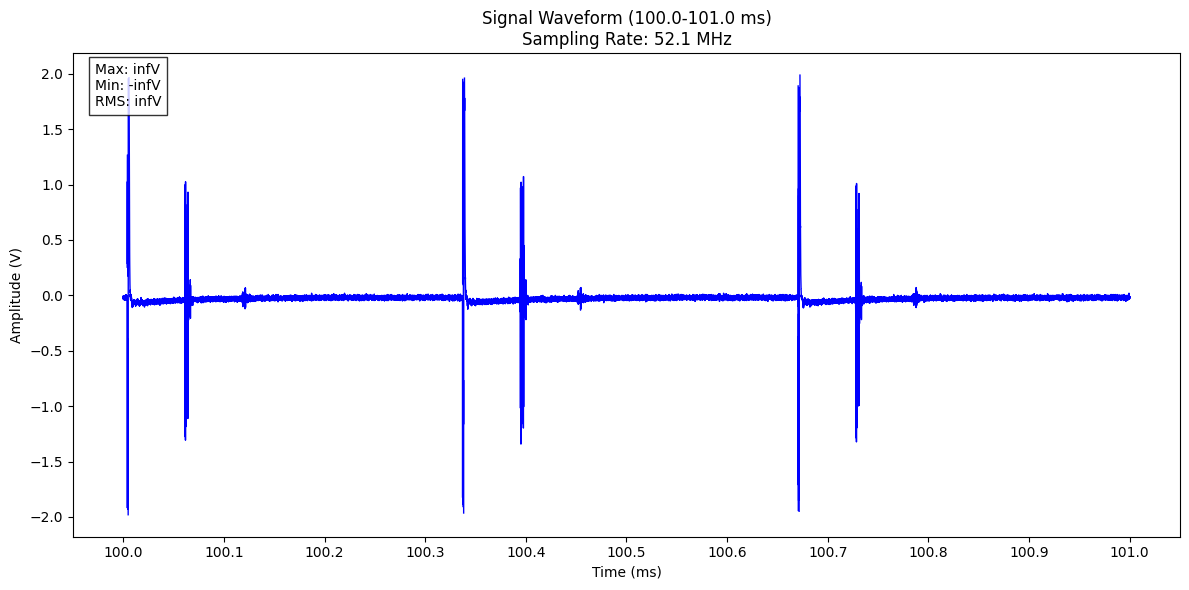

Loading data...
loading success
Found 3000 triggered pulses
Hilbert transform matrix shape: (3000, 5208) (number of pulses x number of samples)


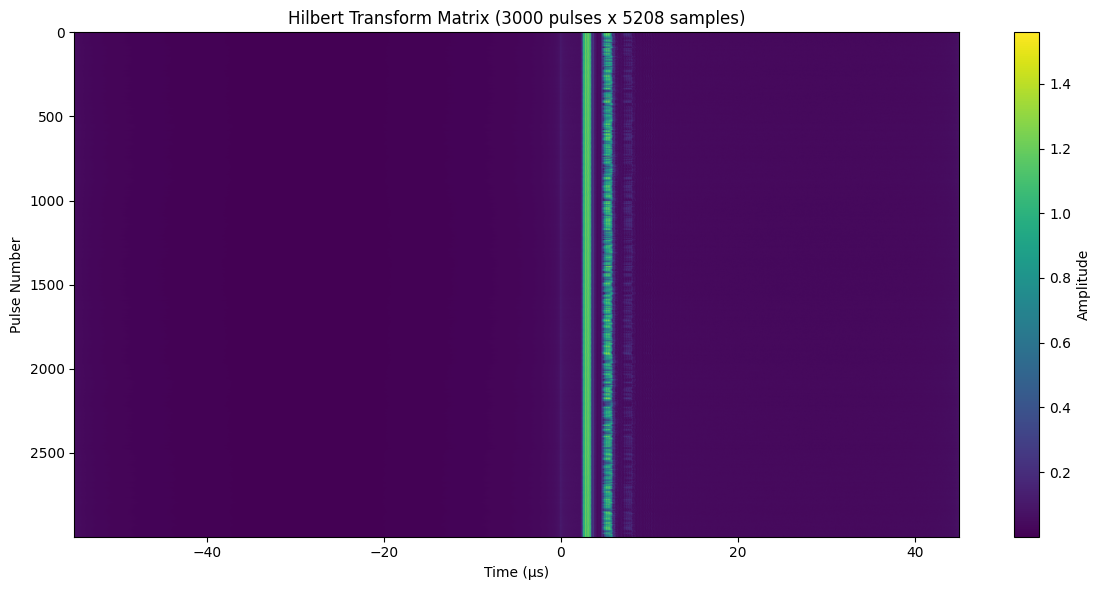

<Figure size 1500x1200 with 0 Axes>

In [ ]:
import numpy as np
import scipy.io as sio
import torch
import matplotlib.pyplot as plt
from scipy import signal

def extract_amplitude_triggered_pulses(file_path, start_time=0.444, duration=0.001, 
                                    window_width=50e-6, amplitude_threshold=2.0):
    """
    Function to extract waveforms for a fixed time after amplitude reaches threshold
    
    Parameters:
    -----------
    file_path : str
        Path to .mat file
    start_time : float
        Start time (seconds)
    duration : float
        Analysis time width (seconds)
    window_width : float
        Width of extraction window (seconds), default 50μs
    amplitude_threshold : float
        Amplitude threshold for triggering
    
    Returns:
    --------
    triggered_pulses : list
        List of triggered pulses
    adjusted_time_us : ndarray
        Adjusted time axis (μs)
    mean_pulse : ndarray
        Mean pulse waveform
    std_pulse : ndarray
        Standard deviation of pulse waveforms
    """
    # Load data
    print("Loading data...")
    mat_data = sio.loadmat(file_path)
    print("loading success")
    signal_data = np.squeeze(mat_data["TDX1"])
    Tinterval = float(mat_data['Tinterval'].item())
    Fs = 1.0 / Tinterval
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    # Extract data from specified time range
    start_idx = int(start_time * Fs)
    duration_samples = int(duration * Fs)
    chunk = signal_data[start_idx:start_idx + duration_samples]
    
    # Detect positions where amplitude exceeds threshold
    window_samples = int(window_width * Fs)
    trigger_points = []
    i = 0
    
    while i < len(chunk) - window_samples:
        if abs(chunk[i]) >= amplitude_threshold:
            trigger_points.append(i)
            i += window_samples  # Start next trigger search after window_width seconds
        else:
            i += 1
    
    # Extract waveforms from each trigger point
    # Initialize lists to store triggered pulses
    triggered_pulses = []  # Store raw pulse data
    triggered_pulses_processed = []  # Store processed pulse data
    triggered_pulses_hilbert = []  # Store processed pulse data
    # Extract pulses for each trigger point
    for trigger in trigger_points:
        # Extract pulse for window_samples seconds from trigger point
        if trigger + window_samples <= len(chunk):
            # Extract pulse
            pulse = chunk[trigger:trigger + window_samples]
            triggered_pulses.append(pulse)
            
            # Remove initial reflections (set signal from 0-3μs to 0)
            neglegible_time = 55e-6 # meaningless time
            processed_pulse = pulse.copy()  # Create copy of pulse
            zero_samples = int(neglegible_time * Fs)  # Calculate samples for 3μs
            processed_pulse[:zero_samples] = 0  # Set initial part to 0
            triggered_pulses_processed.append(processed_pulse)
            
            # Apply Hilbert transform to extract amplitude information
            # Need to import hilbert function from scipy.signal module
            from scipy.signal import hilbert
            analytic_signal = hilbert(processed_pulse)
            amplitude_envelope = np.abs(analytic_signal)
            
            # Store amplitude information after Hilbert transform
            if 'triggered_pulses_hilbert' not in locals():
                triggered_pulses_hilbert = []
            triggered_pulses_hilbert.append(amplitude_envelope)
    
    # Record number of detected pulses
    n_pulses = len(triggered_pulses)
    print(f"Found {n_pulses} triggered pulses")
    
    # Generate time axis (in μs units)
    pulse_time_us = np.arange(window_samples) * Tinterval * 1e6  # Create time axis in μs units
    
    # Time axis with zero point after negligible_time has passed
    zero_samples = int(neglegible_time * Fs)
    adjusted_time_us = np.arange(-zero_samples, window_samples-zero_samples) * Tinterval * 1e6
    
    # Convert Hilbert transform data to matrix format
    hilbert_matrix = np.array(triggered_pulses_hilbert)
    print(f"Hilbert transform matrix shape: {hilbert_matrix.shape} (number of pulses x number of samples)")
    
    # Plot Hilbert transform matrix as color map
    # plt.figure(figsize=(12, 6))
    # im = plt.imshow(hilbert_matrix, aspect='auto', cmap='viridis', 
    #                extent=[adjusted_time_us[0], adjusted_time_us[-1], n_pulses-0.5, -0.5])
    # plt.colorbar(im, label='Amplitude')
    # plt.xlabel('Time (μs)')
    # plt.ylabel('Pulse Number')
    # plt.title('Amplitude Map of Hilbert Transform Matrix')
    # plt.tight_layout()
    
    # # Plot processed pulses in large format
    # plt.figure(figsize=(12, 6))
    
    # for i, processed_pulse in enumerate(triggered_pulses_processed):
    #     plt.plot(adjusted_time_us, processed_pulse, alpha=0.7, label=f'Processed Pulse {i+1}' if i < 5 else '')
    
    # plt.axhline(y=amplitude_threshold, color='r', linestyle='--', alpha=0.5, label='Trigger Level')
    # plt.axhline(y=-amplitude_threshold, color='r', linestyle='--', alpha=0.5)
    # plt.axvline(x=0, color='g', linestyle='-', alpha=0.5, label='Zero Time (After Negligible Time)')
    # plt.xlabel('Time (μs)')
    # plt.ylabel('Amplitude')
    # plt.title('Processed Pulses (Initial Reflections Removed)')
    # plt.grid(True)
    # if n_pulses <= 5:
    #     plt.legend()
    # plt.tight_layout()
    
    # # Plot envelopes after Hilbert transform
    # plt.figure(figsize=(12, 6))
    # for i, envelope in enumerate(triggered_pulses_hilbert):
    #     plt.plot(adjusted_time_us, envelope, alpha=0.7, label=f'Envelope {i+1}' if i < 5 else '')
    
    # plt.axvline(x=0, color='g', linestyle='-', alpha=0.5, label='Zero Time (After Negligible Time)')
    # plt.xlabel('Time (μs)')
    # plt.ylabel('Amplitude')
    # plt.title('Hilbert Transform Envelopes')
    # plt.grid(True)
    # if n_pulses <= 5:
    #     plt.legend()
    # plt.tight_layout()
    
    # Display Hilbert transform matrix as heatmap
    plt.figure(figsize=(12, 6))
    plt.imshow(hilbert_matrix, aspect='auto', cmap='viridis', 
               extent=[adjusted_time_us[0], adjusted_time_us[-1], n_pulses-0.5, -0.5])
    plt.colorbar(label='Amplitude')
    plt.xlabel('Time (μs)')
    plt.ylabel('Pulse Number')
    plt.title(f'Hilbert Transform Matrix ({n_pulses} pulses x {hilbert_matrix.shape[1]} samples)')
    plt.tight_layout()
    plt.show()
    
    # Plot
    plt.figure(figsize=(15, 12))
    
    # # 1. Display all pulses overlaid
    # plt.subplot(2, 2, 1)
    # for i, pulse in enumerate(triggered_pulses):
    #     plt.plot(adjusted_time_us, pulse, alpha=0.5, label=f'Pulse {i+1}' if i < 5 else '')
    # plt.axhline(y=amplitude_threshold, color='r', linestyle='--', alpha=0.5, label='Trigger Level')
    # plt.axhline(y=-amplitude_threshold, color='r', linestyle='--', alpha=0.5)
    # plt.axvline(x=0, color='g', linestyle='-', alpha=0.5, label='Zero Time')
    # plt.xlabel('Time (μs)')
    # plt.ylabel('Amplitude')
    # plt.title('Overlaid Triggered Pulses')
    # plt.grid(True)
    # if n_pulses <= 5:
    #     plt.legend()
    
    # # 2. Display average waveform
    # mean_pulse = np.mean(triggered_pulses, axis=0)
    # std_pulse = np.std(triggered_pulses, axis=0)
    
    # plt.subplot(2, 2, 2)
    # plt.plot(adjusted_time_us, mean_pulse, 'b-', label='Mean')
    # plt.fill_between(adjusted_time_us, 
    #                 mean_pulse - std_pulse, 
    #                 mean_pulse + std_pulse, 
    #                 color='b', alpha=0.2, label='±1 STD')
    # plt.axhline(y=amplitude_threshold, color='r', linestyle='--', alpha=0.5, label='Trigger Level')
    # plt.axhline(y=-amplitude_threshold, color='r', linestyle='--', alpha=0.5)
    # plt.axvline(x=0, color='g', linestyle='-', alpha=0.5, label='Zero Time')
    # plt.xlabel('Time (μs)')
    # plt.ylabel('Amplitude')
    # plt.title('Average Pulse Shape with Standard Deviation')
    # plt.grid(True)
    # plt.legend()
    
    # 3. Average waveform of Hilbert transform
    mean_hilbert = np.mean(triggered_pulses_hilbert, axis=0)
    std_hilbert = np.std(triggered_pulses_hilbert, axis=0)
    
    # plt.subplot(2, 2, 3)
    # plt.plot(adjusted_time_us, mean_hilbert, 'r-', label='Mean Envelope')
    # plt.fill_between(adjusted_time_us, 
    #                 mean_hilbert - std_hilbert, 
    #                 mean_hilbert + std_hilbert, 
    #                 color='r', alpha=0.2, label='±1 STD')
    # plt.axvline(x=0, color='g', linestyle='-', alpha=0.5, label='Zero Time')
    # plt.xlabel('Time (μs)')
    # plt.ylabel('Amplitude')
    # plt.title('Average Hilbert Envelope with Standard Deviation')
    # plt.grid(True)
    # plt.legend()
    
    # # 4. Comparison of raw waveform and envelope
    # plt.subplot(2, 2, 4)
    # plt.plot(adjusted_time_us, mean_pulse, 'b-', label='Mean Signal')
    # plt.plot(adjusted_time_us, mean_hilbert, 'r-', label='Mean Envelope')
    # plt.axvline(x=0, color='g', linestyle='-', alpha=0.5, label='Zero Time')
    # plt.xlabel('Time (μs)')
    # plt.ylabel('Amplitude')
    # plt.title('Comparison of Signal and Envelope')
    # plt.grid(True)
    # plt.legend()
    
    # plt.tight_layout()
    # plt.show()
    
    
    
    return triggered_pulses, adjusted_time_us, mean_pulse, std_pulse

# Usage example
file_path = "Z:\database\samples\P20240730-1100.mat"
#plot_signal_waveform(file_path, start_ms=100, end_ms=101)
pulses, time, mean_pulse, std_pulse = extract_amplitude_triggered_pulses(
    file_path,
    start_time=2.0, #seconds, measurement start point
    duration=1, #seconds, measurement time
    window_width=100e-6, #pulse occurs 3 times per 1ms as we're irradiating at 3kHz
    amplitude_threshold=2.0
)

Loading data...
loading success
cuda
Found 3000 triggered pulses
Hilbert transform matrix shape: (3000, 5208) (number of pulses x number of samples)


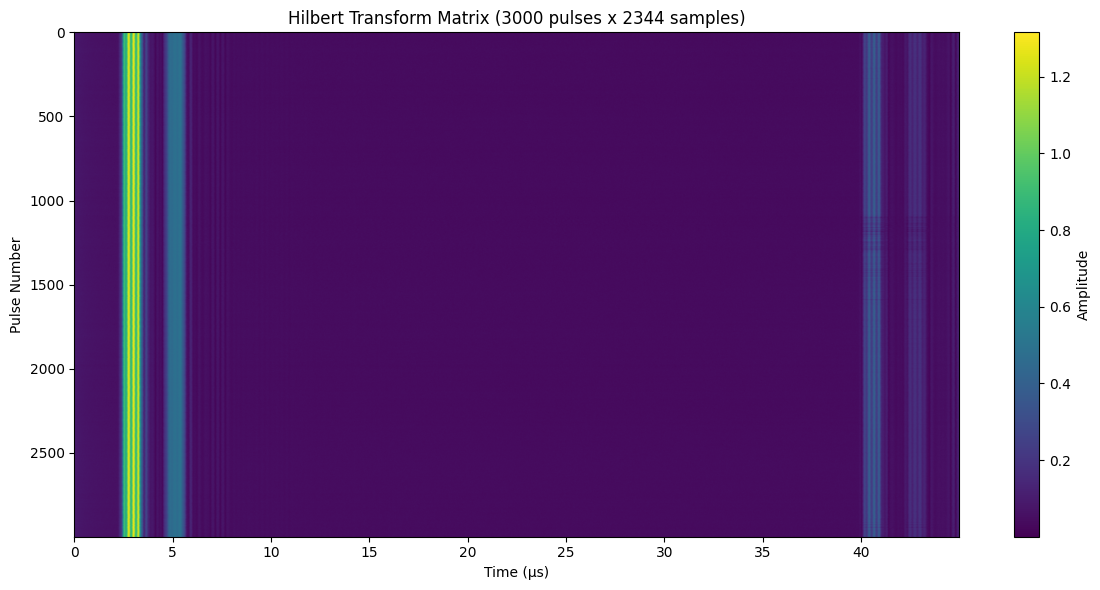

<Figure size 1500x1200 with 0 Axes>

In [41]:
import numpy as np
import scipy.io as sio
import torch
import matplotlib.pyplot as plt
from scipy import signal

def extract_amplitude_triggered_pulses(file_path, start_time=0.444, duration=0.001, 
                                    window_width=50e-6, amplitude_threshold=2.0):
    """
    Function to extract waveforms for a fixed time after amplitude reaches threshold
    Accelerate processing using GPU
    
    Parameters:
    -----------
    file_path : str
        Path to .mat file
    start_time : float
        Start time (seconds)
    duration : float
        Analysis time width (seconds)
    window_width : float
        Width of extraction window (seconds), default 50μs
    amplitude_threshold : float
        Amplitude threshold for triggering
    
    Returns:
    --------
    triggered_pulses : list
        List of triggered pulses
    adjusted_time_us : ndarray
        Adjusted time axis (μs)
    mean_pulse : ndarray
        Mean pulse waveform
    std_pulse : ndarray
        Standard deviation of pulse waveforms
    """
    # Load data
    print("Loading data...")
    mat_data = sio.loadmat(file_path)
    print("loading success")
    signal_data = np.squeeze(mat_data["TDX1"])
    Tinterval = float(mat_data['Tinterval'].item())
    Fs = 1.0 / Tinterval
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(device)
    # Extract data from specified time range
    start_idx = int(start_time * Fs)
    duration_samples = int(duration * Fs)
    chunk = signal_data[start_idx:start_idx + duration_samples]
    
    # Transfer to GPU
    chunk_tensor = torch.tensor(chunk, device=device, dtype=torch.float32)
    
    # Detect positions where amplitude exceeds threshold (GPU version)
    window_samples = int(window_width * Fs)
    
    # Detect positions exceeding threshold (parallel processing on GPU)
    threshold_mask = torch.abs(chunk_tensor) >= amplitude_threshold
    potential_triggers = torch.where(threshold_mask)[0].cpu().numpy()
    
    # Select trigger points (avoid duplicates)
    trigger_points = []
    last_trigger = -window_samples
    
    for trigger in potential_triggers:
        if trigger > last_trigger + window_samples:
            trigger_points.append(trigger)
            last_trigger = trigger
    
    # Extract waveforms from each trigger point
    # Initialize lists to store triggered pulses
    triggered_pulses = []  # Store raw pulse data
    
    # Prepare batch for GPU processing
    valid_triggers = [t for t in trigger_points if t + window_samples <= len(chunk)]
    n_pulses = len(valid_triggers)
    
    if n_pulses == 0:
        print("No valid pulses found")
        return [], np.array([]), np.array([]), np.array([])
    
    # Create tensor to store all pulses at once in GPU memory
    all_pulses_tensor = torch.zeros((n_pulses, window_samples), device=device)
    
    # Extract pulse from each trigger point
    for i, trigger in enumerate(valid_triggers):
        all_pulses_tensor[i] = chunk_tensor[trigger:trigger + window_samples]
        # Keep CPU list as well
        triggered_pulses.append(chunk[trigger:trigger + window_samples])
    
    # Remove initial reflection (set 0-55μs signal to 0)
    neglegible_time = 55e-6  # meaningless time
    zero_samples = int(neglegible_time * Fs)  # Calculate samples for 55μs
    
    processed_pulses_tensor = all_pulses_tensor.clone()
    processed_pulses_tensor[:, :zero_samples] = 0  # Set initial part to 0
    
    # Execute Hilbert transform on GPU (Since PyTorch doesn't have direct Hilbert transform,
    # transfer back to CPU and process with SciPy)
    processed_pulses_np = processed_pulses_tensor.cpu().numpy()
    
    # Apply Hilbert transform with batch processing
    from scipy.signal import hilbert
    hilbert_matrix = np.zeros_like(processed_pulses_np)
    
    for i in range(n_pulses):
        analytic_signal = hilbert(processed_pulses_np[i])
        hilbert_matrix[i] = np.abs(analytic_signal)
    
    # Transfer results back to GPU if needed
    hilbert_tensor = torch.tensor(hilbert_matrix, device=device)
    
    print(f"Found {n_pulses} triggered pulses")
    
    # Generate time axis (in μs)
    pulse_time_us = np.arange(window_samples) * Tinterval * 1e6
    
    # Time axis adjusted for zero point
    adjusted_time_us = np.arange(-zero_samples, window_samples-zero_samples) * Tinterval * 1e6
    
    print(f"Hilbert transform matrix shape: {hilbert_matrix.shape} (number of pulses x number of samples)")
    
    # Create Hilbert transform matrix excluding time from -60 to 0
    hilbert_matrix_trimmed = hilbert_matrix[:, zero_samples:]
    adjusted_time_us_trimmed = adjusted_time_us[adjusted_time_us >= 0]
    
    # Plot the entire matrix
    plt.figure(figsize=(12, 6))
    plt.imshow(hilbert_matrix_trimmed, aspect='auto', cmap='viridis', 
               extent=[0, adjusted_time_us_trimmed[-1], n_pulses-0.5, -0.5])
    plt.colorbar(label='Amplitude')
    plt.xlabel('Time (μs)')
    plt.ylabel('Pulse Number')
    plt.title(f'Hilbert Transform Matrix ({n_pulses} pulses x {hilbert_matrix_trimmed.shape[1]} samples)')
    plt.tight_layout()
    plt.show()
    # Calculate average waveform (executed on GPU)
    mean_pulse = torch.mean(all_pulses_tensor, dim=0).cpu().numpy()
    std_pulse = torch.std(all_pulses_tensor, dim=0).cpu().numpy()
    
    # Average waveform of Hilbert transform
    mean_hilbert = torch.mean(hilbert_tensor, dim=0).cpu().numpy()
    std_hilbert = torch.std(hilbert_tensor, dim=0).cpu().numpy()
    
    plt.figure(figsize=(15, 12))
    
    return triggered_pulses, adjusted_time_us, mean_pulse, std_pulse

# Usage example
file_path = "Z:\database\samples\P20240726-1600.mat"
#plot_signal_waveform(file_path, start_ms=100, end_ms=101)
pulses, time, mean_pulse, std_pulse = extract_amplitude_triggered_pulses(
    file_path,
    start_time=2.0, #seconds, measurement start point
    duration=1, #seconds, measurement time
    window_width=100e-6, #pulse occurs 3 times per 1ms as we're irradiating at 3kHz
    amplitude_threshold=2.0
)

Loading data...
loading success
cuda
Found 3000 triggered pulses
Hilbert transform matrix shape: (3000, 5208) (number of pulses x number of samples)
パルス数: 3000
画像を保存しました: C:\Users\apetr\Documents\psdata2matlab\tmp\P20240726-1600_tdx1.png


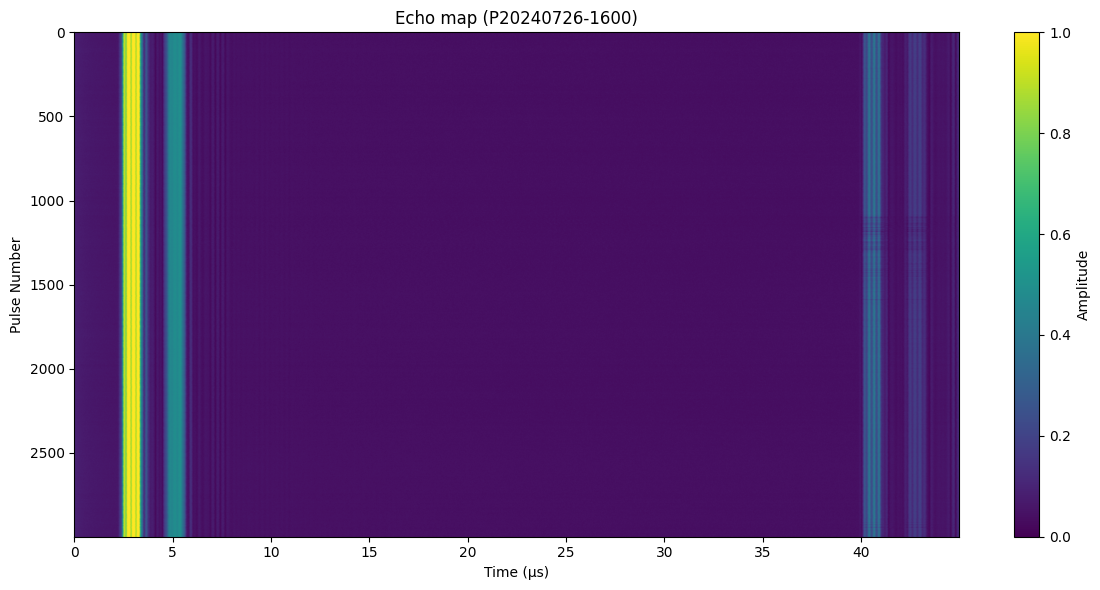

<Figure size 1500x1200 with 0 Axes>

In [1]:
from src import generate_echomap

file_path = "Z:\database\samples\P20240726-1600.mat"
save_dir = "C:\\Users\\apetr\\Documents\\psdata2matlab\\tmp"
triggered_pulses, adjusted_time_us, mean_pulse, std_pulse = generate_echomap(
    file_path, 
    start_time=2, 
    duration=1,
    window_width=100e-6, 
    amplitude_threshold=2.0, 
    output_dir=save_dir)


In [ ]:
import os
import sys
from src import generate_echomap
from datetime import datetime

# 入力ディレクトリと出力ディレクトリの設定
input_dir = r"Z:\database\signal_mat"
output_dir = r"Z:\database\images\tmp"
log_file = os.path.join(output_dir, f"processing_log_{datetime.now().strftime('%Y%m%d_%H%M%S')}.txt")

# 出力ディレクトリが存在しない場合は作成
os.makedirs(output_dir, exist_ok=True)

# 標準出力をファイルにリダイレクト
original_stdout = sys.stdout
with open(log_file, 'w', encoding='utf-8') as f:
    sys.stdout = f
    
    print(f"処理開始時刻: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
    print(f"入力ディレクトリ: {input_dir}")
    print(f"出力ディレクトリ: {output_dir}")
    print("-" * 50)
    
    # 入力ディレクトリ内のすべての.matファイルを処理
    for filename in os.listdir(input_dir):
        if filename.endswith('.mat'):
            file_path = os.path.join(input_dir, filename)
            print(f"処理中: {filename}")
            
            try:
                # generate_echomapを実行
                triggered_pulses, adjusted_time_us, mean_pulse, std_pulse = generate_echomap(
                    file_path, 
                    start_time=2, 
                    duration=1,
                    window_width=100e-6, 
                    amplitude_threshold=2.0, 
                    output_dir=output_dir)
                
                print(f"完了: {filename}")
            except Exception as e:
                print(f"エラー発生 ({filename}): {str(e)}")
    
    print("-" * 50)
    print(f"すべてのファイル処理が完了しました。")
    print(f"処理終了時刻: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

# 標準出力を元に戻す
sys.stdout = original_stdout
print(f"処理が完了しました。ログは {log_file} に保存されています。")